# Regressions

**Goal**: 
1. Simulate data from the OLS model and obtain OLS estimates from it.
2. Demonstrate methods available for the fitted OLS model.
3. Obtain OLS estimates when $X$ has a categorical variable.

In [1]:
# Julia Version
VERSION 

v"1.0.5"

## Simple Linear Regression

In [2]:
# Loading the required packages
using Distributions # to generate random distributions
using Random # to set the seed for reproducibility
using Plots # for plotting
using BenchmarkTools # for benchmarking code
using GLM # for regressions
using DataFrames # for DataFrames

In [3]:
# Set seed
Random.seed!(42);

In [4]:
# Simulate some dataset
x = rand(Uniform(0, 10), 100) # 100 draws from U(0,10)
y = 2 .+ 3 .* x .+ randn(100) # beta = [2, 3] and sigma = 1
@show typeof(x) # Array{Float64, 1}
@show typeof(y) # Array{Float64, 1}

typeof(x) = Array{Float64,1}
typeof(y) = Array{Float64,1}


Array{Float64,1}

In [5]:
# Linear regression using dataframes
dat = DataFrame(X = x, Y=y)
ols = lm(@formula(Y ~ X), dat)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Y ~ 1 + X

Coefficients:
──────────────────────────────────────────────────────────────────────────
             Estimate  Std. Error  t value  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)   1.88442   0.203464    9.2617    <1e-14    1.48066    2.28819
X             3.00623   0.0366987  81.9166    <1e-91    2.9334     3.07906
──────────────────────────────────────────────────────────────────────────

If you are familiar with `R`, the table above would look similar to the one you would get when running the `lm` function in `R`.

In [6]:
@show typeof(dat) # dat is a DataFrame
@show typeof(ols); # ols is an object of type inherited from the GLM package

typeof(dat) = DataFrame
typeof(ols) = StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}


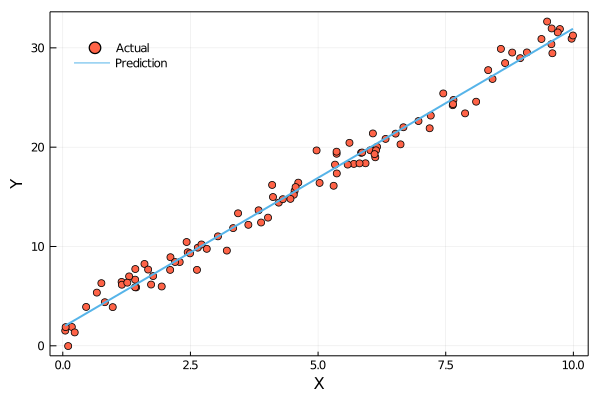

In [7]:
# Plotting for regressions
## Start with the scatter plot of X and Y
scatter(dat[!,:X], dat[!,:Y], color="tomato", framestyle=:box, xlabel="X", ylabel="Y", label="Actual",
foreground_color_legend=nothing, background_color_legend=nothing, legend= :topleft)
## Plot the prediction using the predict function
plot!(dat[!,:X], predict(ols), linewidth=2, color="#56b4e9", label="Prediction")

In [8]:
# Benchmarking the OLS results from Julia's lm
ols_bench = @benchmark ols = lm($@formula(Y ~ X), $dat)

BenchmarkTools.Trial: 
  memory estimate:  22.58 KiB
  allocs estimate:  176
  --------------
  minimum time:     26.800 μs (0.00% GC)
  median time:      31.492 μs (0.00% GC)
  mean time:        36.366 μs (8.12% GC)
  maximum time:     3.149 ms (98.28% GC)
  --------------
  samples:          10000
  evals/sample:     1

### Methods 

`Julia` provides a wide range of functions to extract useful things from the regressions.
Many of these methods in the package have names similar to the ones in `R`. 

In [9]:
# Extract the coefficients using
@show coef(ols)
# Extract the R square using 
@show r2(ols)
# Extract the standard errors of the coefficients using
@show stderror(ols)
# Extract the variance covariance matrix using
@show vcov(ols)
# Extract the weighted residual sum of squares using
@show deviance(ols); # Deviance calculates the weighted RSS for lm models

coef(ols) = [1.88442, 3.00623]
r2(ols) = 0.9856058705451252
stderror(ols) = [0.203464, 0.0366987]
vcov(ols) = [0.0413976 -0.00637894; -0.00637894 0.00134679]
deviance(ols) = 109.60769402521824


In [10]:
# Predict the dependent variable Y using
yhat = predict(ols)
# Get the residuals using
ϵ = residuals(ols)
ols_results = DataFrame(Y = y, yhat = yhat, residual = ϵ)
# You can view the first 6 results using 
first(ols_results, 6) ## similar to head() in R

,Y,yhat,residual
,Float64,Float64,Float64
1,18.2427,17.9131,0.329557
2,15.5952,15.5336,0.0616195
3,1.89852,2.41613,-0.517606
4,6.16757,7.08319,-0.915619
5,29.4563,30.712,-1.25569
6,31.894,31.1521,0.741971


## Dummy Variable Regression

In [11]:
## Suppose you have this data
age = [21, 62, 54, 49, 52, 38]
education = categorical(["college", "school", "none", "school", "college", "none"])
education_code = [2, 1, 0, 1, 2, 0]
people = DataFrame(age = age, education = education, code = education_code)

,age,education,code
,Int64,Cat…,Int64
1,21,college,2
2,62,school,1
3,54,none,0
4,49,school,1
5,52,college,2
6,38,none,0


In [12]:
@show typeof(people[!,:age])
@show typeof(people[!,:education])
@show typeof(people[!,:code])
# You can access the levels of the categorical variable as
@show levels(people[!,:education]);

typeof(people[!, :age]) = Array{Int64,1}
typeof(people[!, :education]) = CategoricalArray{String,1,UInt32,String,CategoricalValue{String,UInt32},Union{}}
typeof(people[!, :code]) = Array{Int64,1}
levels(people[!, :education]) = ["college", "none", "school"]


In [13]:
# Run a dummy variable regression
dummyreg = lm(@formula(age ~ education), people)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

age ~ 1 + education

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                   Estimate  Std. Error   t value  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)            36.5     10.7471  3.39627     0.0426    2.29795     70.702
education: none         9.5     15.1987  0.625054    0.5763  -38.869       57.869
education: school      19.0     15.1987  1.25011     0.2999  -29.369       67.369
─────────────────────────────────────────────────────────────────────────────────

In [14]:
# Benchmark the results
dummyreg_bench = @benchmark dummy = lm($@formula(age ~ education), $people)

BenchmarkTools.Trial: 
  memory estimate:  22.59 KiB
  allocs estimate:  305
  --------------
  minimum time:     41.458 μs (0.00% GC)
  median time:      49.599 μs (0.00% GC)
  mean time:        55.203 μs (8.57% GC)
  maximum time:     5.045 ms (98.19% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [15]:
# Suppose you want to work with the third column instead of the second one. The third column is of type Int64.
# The obvious regression would go wrong because Julia would understand that this is an integer explanatory variable.
notadummy = lm(@formula(age ~ code), people)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

age ~ 1 + code

Coefficients:
────────────────────────────────────────────────────────────────────────────
             Estimate  Std. Error    t value  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)     50.75    10.0195    5.06512     0.0072    22.9314    78.5686
code            -4.75     7.76108  -0.612028    0.5736   -26.2982    16.7982
────────────────────────────────────────────────────────────────────────────

In [16]:
# You will have to convert it to a categorical variable before running the regression
people.code = categorical(people.code)
@show levels(people.code) # Notice that the ordering of levels are different than what we had for education
# We can fix this by re-ordering the levels to make them the same as we had for education
levels!(people.code, [2, 0, 1])
@show levels(people.code)
yesadummy = lm(@formula(age ~ code), people)

levels(people.code) = [0, 1, 2]
levels(people.code) = [2, 0, 1]


StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

age ~ 1 + code

Coefficients:
───────────────────────────────────────────────────────────────────────────
             Estimate  Std. Error   t value  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)      36.5     10.7471  3.39627     0.0426    2.29795     70.702
code: 0           9.5     15.1987  0.625054    0.5763  -38.869       57.869
code: 1          19.0     15.1987  1.25011     0.2999  -29.369       67.369
───────────────────────────────────────────────────────────────────────────

In [17]:
# We can check if the coefficients are the same using ==
@show coef(dummyreg) == coef(yesadummy)
# or, using \approx (is generally used to take into account the rounding error -- which will not be the case here.)
@show coef(dummyreg) ≈ coef(yesadummy);

coef(dummyreg) == coef(yesadummy) = true
coef(dummyreg) ≈ coef(yesadummy) = true
